In [58]:
# Dependencias
import json
import pandas as pd
import random
import time
import matplotlib.pyplot as plt

# Introducción

En esta ocasión, se comparará en términos del tiempo promedio que lleva a cada algoritmo realizar 100 búsquedas de 1000 identificadores en un arreglo de 50,000 elementos. Se comprobará cuál es el algoritmo más eficiente a partir de esta métrica.

# - Use el archivo listas-posteo-100.json, contiene las 100 listas de posteo más frecuentes, se encuentran en formato JSON.
# - Utilice las listas (sin el término asociado).

In [71]:
# Leyendo el archivo listas-posteo-100.json

# open the JSON file and load it as a list of lists
with open('listas-posteo-100_.json', 'r') as f:
    data = json.load(f)


# - Seleccione 1000 identificadores de documentos al azar, entre 1 y n, recuerde que n = 50, 000.

In [3]:
# creamos función de selección aleatoria en una lista de listas
def seleccionar_identificadores(lista_de_listas, n):
    numeros = []
    for sublista in lista_de_listas:
        numeros.extend(sublista)
    identificadores = random.sample(numeros, n)
    return identificadores

In [4]:
identificadores_seleccionados = seleccionar_identificadores(data,1000)
print(f'Así se ven los identificadores seleccionados aleatoriamente, tomo los primeros 10 identificadores solamente: {identificadores_seleccionados[:10]}')
print(f'Se confirma que se trata de {len(identificadores_seleccionados)} números.')

Así se ven los identificadores seleccionados aleatoriamente, tomo los primeros 10 identificadores solamente: [5598, 3511, 3112, 42642, 42849, 5926, 18765, 7231, 31881, 43128]
Se confirma que se trata de 1000 números.


# Grafique el tiempo promedio de buscar los 1000 identificadores en todas las listas (un solo número que represente las 100 × 1000 búsquedas). Nota: lo que determinará al buscar es la posición de inserción que se define como el lugar donde debería estar el identificador si se encontrara en la lista.
# - Los algoritmos que caracterizará son los siguientes (nombres con referencia a [@Bentley76]):
## – Búsqueda binaria acotada
## – Búsqueda secuencial B0
## – Búsqueda no acotada B1
## – Búsqueda no acotada B2
## – Importante: Tal vez deba repetir varias veces cada búsqueda si los tiempos son muy pequeños.
# - Bosqueje en pseudo-código la implementación de la búsqueda casí optima Bk

# 1. Búsqueda binaria acotada

In [15]:
# se crea una función para el cálculo de la binaria normal acotada
    
def busqueda_binaria_posicion(lista_de_listas, lista_objetivo):

    # Como indica la literatura, es menos costoso realizar la búsqueda en un arreglo ordenado, por esta razón se incluye un arreglo ordenado a partir de lo siguiente:

    lista_plana = [(num, i, j) for i, sublist in enumerate(lista_de_listas) for j, num in enumerate(sublist)]
    lista_plana.sort()

    # haciendo la búsqueda binaria acotada
    resultados = []
    for num_obj in lista_objetivo:
        left = 0
        right = len(lista_plana) - 1
        found = False
        while left <= right:
            mid = (left + right) // 2
            if lista_plana[mid][0] < num_obj:
                left = mid + 1
            elif lista_plana[mid][0] > num_obj:
                right = mid - 1
            else:
                found = True
                break

        if found:
            resultados.append((num_obj, lista_plana[mid][1], lista_plana[mid][2]))
            
    return resultados




In [46]:
# aplicando la búsqueda binaria acotada para el resultado
posicion_insersion = busqueda_binaria_posicion(data, identificadores_seleccionados)
print(f'La búsqueda nos proporcina arreglos ordenados de la forma (identificador buscado, lista original a la que pertenece, posición o índice en la lista), tal y como se puede ver a continuación: {posicion_insersion[:10]}')


La búsqueda nos proporcina arreglos ordenados de la forma (identificador buscado, lista original a la que pertenece, posición o índice en la lista), tal y como se puede ver a continuación: [(5598, 1, 1011), (3511, 14, 684), (3112, 30, 185), (42642, 0, 35004), (42849, 0, 35178), (5926, 0, 4664), (18765, 6, 1425), (7231, 10, 2687), (31881, 53, 750), (43128, 4, 1925)]


In [7]:
# Para calcular el tiempo promedio en 100 x 1000 búsquedas
tiempo_total = 0
num_busquedas = 100

for i in range(num_busquedas):
    tiempo_inicio = time.time()
    resultados = busqueda_binaria_posicion(data, identificadores_seleccionados)
    tiempo_final = time.time()
    tiempo_busqueda = tiempo_final - tiempo_inicio
    tiempo_total += tiempo_busqueda

tiempo_promedio = tiempo_total / num_busquedas
print("El tiempo promedio: {:.6f} segundos".format(tiempo_promedio))

El tiempo promedio: 0.057958 segundos


# 2. Búsqueda secuencial B0

In [11]:
def busqueda_secuencial_B0(lista_a_buscar, lista_de_listas):
    lista_plana = [(num, i, j) for i, sublist in enumerate(lista_de_listas) for j, num in enumerate(sublist)]
    lista_plana.sort()

    resultados = {number: [] for number in lista_a_buscar}
    for i in range(len(lista_plana)):
        if lista_plana[i][0] in lista_a_buscar:
            resultados[lista_plana[i][0]].append((lista_plana[i][1], lista_plana[i][2]))
    return resultados


In [12]:
# aplicando la búsqueda secuencial B0
posicion = busqueda_secuencial_B0(identificadores_seleccionados, data)
print(f'La búsqueda nos proporcina arreglos ordenados de la forma (identificador buscado, lista original a la que pertenece, posición o índice en la lista), tal y como se puede ver a continuación: {dict(list(posicion.items())[:3])}')

La búsqueda nos proporcina arreglos ordenados de la forma (identificador buscado, lista original a la que pertenece, posición o índice en la lista), tal y como se puede ver a continuación: {5598: [(6, 1011), (41, 88), (85, 137)], 3511: [(5, 684), (6, 743), (94, 89)], 3112: [(0, 2346), (1, 1210), (29, 108), (49, 185)]}


In [14]:
# Para calcular el tiempo promedio en 100 x 1000 búsquedas
tiempo_total = 0
num_busquedas = 100

for i in range(num_busquedas):
    tiempo_inicio = time.time()
    resultados = busqueda_secuencial_B0(identificadores_seleccionados,data)
    tiempo_final = time.time()
    tiempo_busqueda = tiempo_final - tiempo_inicio
    tiempo_total += tiempo_busqueda

tiempo_promedio = tiempo_total / num_busquedas
print("El tiempo promedio: {:.6f} segundos".format(tiempo_promedio))

El tiempo promedio: 2.642852 segundos


# 3. Búsqueda no acotada B1

In [43]:
def busqueda_no_acotada_B1(lista_de_listas, lista_objetivo):
# debe ser sobre un universo de datos ordenados para reducir los costos
    lista_aplanada = [num for sublist in lista_de_listas for num in sublist]
    lista_aplanada.sort()
    resultados = []
    for val in lista_objetivo:
        found = False
        left, right = 0, len(lista_aplanada) - 1
        while left <= right:
            mid = (left + right) // 2
            if lista_aplanada[mid] == val:
                found = True
                break
            elif lista_aplanada[mid] < val:
                left = mid + 1
            else:
                right = mid - 1
        if found:
            for i, sublist in enumerate(lista_de_listas):
                for j, num in enumerate(sublist):
                    if num == val:
                        resultados.append((val,i, j))
    return resultados


In [45]:
# aplicando la búsqueda acotada B1
posicion_insersion = busqueda_no_acotada_B1(data, identificadores_seleccionados)
print(f'La búsqueda nos proporcina arreglos ordenados de la forma (identificador buscado, lista original a la que pertenece, posición o índice en la lista), tal y como se puede ver a continuación: {posicion_insersion[:10]}')

La búsqueda nos proporcina arreglos ordenados de la forma (identificador buscado, lista original a la que pertenece, posición o índice en la lista), tal y como se puede ver a continuación: [(5598, 1, 1011), (5598, 44, 137), (5598, 65, 88), (3511, 1, 743), (3511, 14, 684), (3511, 40, 89), (3112, 0, 2346), (3112, 10, 1210), (3112, 30, 185), (3112, 41, 108)]


In [50]:
# Para calcular el tiempo promedio en 100 x 1000 búsquedas
tiempo_total = 0
num_busquedas = 100

for i in range(num_busquedas):
    tiempo_inicio = time.time()
    resultados =busqueda_no_acotada_B1(data, identificadores_seleccionados)
    tiempo_final = time.time()
    tiempo_busqueda = tiempo_final - tiempo_inicio
    tiempo_total += tiempo_busqueda

tiempo_promedio = tiempo_total / num_busquedas
print("El tiempo promedio: {:.6f} segundos".format(tiempo_promedio))

El tiempo promedio: 9.165755 segundos


# 4. Búsqueda no acotada B2

In [54]:
def busqueda_no_acotada_B2(lista_de_listas, lista_objetivo):

    lista_plana = [num for sublist in lista_de_listas for num in sublist]
    lista_plana.sort()
    resultados = []
    for val in lista_objetivo:
        found = False
        left, right = 0, len(lista_plana) - 1
        while left < right:
            mid = (left + right) // 2
            if lista_plana[mid] < val:
                left = mid + 1
            else:
                right = mid
        if lista_plana[left] == val:
            # busqueda líneal para encontrar la mejor opción
            for i, sublist in enumerate(lista_de_listas):
                for j, num in enumerate(sublist):
                    if num == val:
                        resultados.append((val, i, j))
    return resultados


In [55]:
# aplicando la búsqueda acotada B2
posicion_insersion = busqueda_no_acotada_B2(data, identificadores_seleccionados)
print(f'La búsqueda nos proporcina arreglos ordenados de la forma (identificador buscado, lista original a la que pertenece, posición o índice en la lista), tal y como se puede ver a continuación: {posicion_insersion[:10]}')

La búsqueda nos proporcina arreglos ordenados de la forma (identificador buscado, lista original a la que pertenece, posición o índice en la lista), tal y como se puede ver a continuación: [(5598, 1, 1011), (5598, 44, 137), (5598, 65, 88), (3511, 1, 743), (3511, 14, 684), (3511, 40, 89), (3112, 0, 2346), (3112, 10, 1210), (3112, 30, 185), (3112, 41, 108)]


In [56]:
# Para calcular el tiempo promedio en 100 x 1000 búsquedas
tiempo_total = 0
num_busquedas = 100

for i in range(num_busquedas):
    tiempo_inicio = time.time()
    resultados =busqueda_no_acotada_B2(data, identificadores_seleccionados)
    tiempo_final = time.time()
    tiempo_busqueda = tiempo_final - tiempo_inicio
    tiempo_total += tiempo_busqueda

tiempo_promedio = tiempo_total / num_busquedas
print("El tiempo promedio: {:.6f} segundos".format(tiempo_promedio))

El tiempo promedio: 7.108070 segundos


# Resultados Gráficos

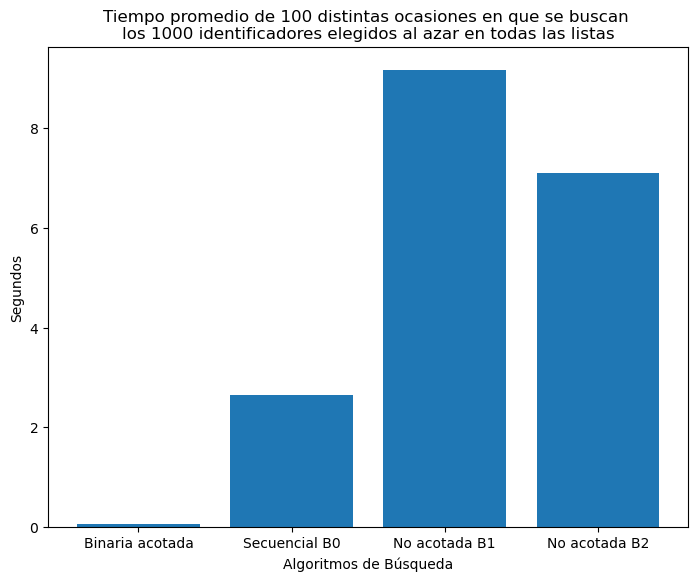

In [70]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Algoritmos = ['Binaria acotada', 'Secuencial B0', 'No acotada B1', 'No acotada B2']
Tiempo_Promedio = [0.057958,2.642852,9.165755,7.108070]
ax.bar(Algoritmos,Tiempo_Promedio)
plt.xlabel('Algoritmos de Búsqueda') 
plt.ylabel('Segundos') 
plt.title("Tiempo promedio de 100 distintas ocasiones en que se buscan \nlos 1000 identificadores elegidos al azar en todas las listas")
plt.show()

# 5. Bosqueje en pseudo-código la implementación de la búsqueda casí optima Bk

In [ ]:
def busqueda_casi_optima(lista_de_listas, lista_objetivo):

    lista_plana = [num for sublist in lista_de_listas for num in sublist]
    lista_plana.sort()
    resultados = []
    
   low_index = 0
   high_index = length(list) - 1
   midpoint = (low_index + high_index) / 2

   WHILE (low_index < high_index AND list[midpoint] != target)

        if lista_plana[left] == val:
            # busqueda líneal para encontrar la mejor opción
            for i, sublist in enumerate(lista_de_listas):
                for j, num in enumerate(sublist):
                    if num == val:
                        resultados.append((val, i, j))
    return resultados

# Conclusiones

La búsqueda del algoritmos más eficiente es crucial para el tratamiento de datos masivos. En lo personal los principios básicos aprendidos en esta ocasión son particularmente utiles, como es el caso de siempre actuar con un arreglo o lista ordenada para efectos de reducir el costo de la búsqueda, toda vez que si no estuvieran ordenados los datos se tendrían que revisar cada uno de los elementos. Es por esta razón que al momento de la construcción de los algoritmos de búsqueda se cuido este aspecto y se ordenó la lista de listas a cada momento. 

Fue también crucial hacer lo que en la literatura se conoce como una tabla plana, para efectos de normalizar la lista de listas y tener un buscador más eficiente.

El preprocesamiento de la información en este sentido se considera crucial y relevante para el diseño del buscador. 

Otro principio, sin lugar a duda relevante, es que los costos de búsqueda en los casos no acotados, no dependen del tamaño del arreglo sino de la consulta misma (son adaptativos). La idea de eficiencia es clave aquí y buscamos que la búsqueda no cueste más del peor de los casos. 

Entre mayor sea el caso acotado B0, B1, B2, B3..., saltaremos más rápido en la búsqueda, pero esta se adaptará mucho mejor. Digamos que esa sería la disyuntiva.

Finalmente, la búsqueda Binaria Acotada fue la más eficiente en términos del tiempo promedio invertido en cada consulta.

# Bibliografía y referencias
- How to Do a Binary Search in Python: https://realpython.com/binary-search-python/
- Python: Sequential search: https://www.w3resource.com/python-exercises/data-structures-and-algorithms/python-search-and-sorting-exercise-2.php
-  [@Knuth98]: Donald E. Knuth. 1998. The Art of Computer Programming, Volume 3: (2nd
Ed.) Sorting and Searching. Addison Wesley Longman Publishing Co., Inc., Redwood City,
CA, USA.
- [@Bentley76]: Jon Louis Bentley, Andrew Chi-Chih Yao. An almost optimal algorithm for
unbounded searching. Information Processing Letters, Volume 5, Issue 3, 1976, Pages 82-87.
ISSN 0020-0190. https://doi.org/10.1016/0020-0190(76)90071-5.
- [@Bentley85]: Bentley, J.L., McGeoch, C.C. Amortized analyses of self-organizing sequential search heuristics. (1985) Communications of the ACM, 28 (4), pp. 404-411. Doi:
10.1145/3341.3349.
- [@Cormen01]: Cormen et. al. Introduction to algorithms. MIT press 2001. 2nd edition.
- [@Sedgewick98]: Robert Sedgewick. Algorithms in C++ - Parts 1-4: Fundamentals, Data
Structures, Sorting, Searching. Addison-Wesley-Longman, 1998. 3rd Edition